In [1]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [2]:
model.layers

In [3]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
conv.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 1.24758564e-01, -2.43247673e-01,  1.50517106e-01,
           -1.46994695e-01, -2.66740441e-01,  1.62285447e-01,
            1.62826777e-01, -1.09895237e-01,  3.86581570e-02,
           -2.31163055e-01, -1.64747864e-01, -1.89106524e-01,
            1.65694118e-01, -4.01431203e-01,  2.36312095e-02,
            1.31893322e-01, -2.49249325e-03,  3.26658040e-01,
           -3.97827886e-02,  1.82740048e-01,  1.10099673e-01,
            1.26994580e-01, -6.33042976e-02,  1.53157666e-01,
           -2.90786065e-02, -1.38241470e-01, -8.69696259e-01,
            6.01603836e-02, -9.91571099e-02,  1.90149978e-01,
            1.02384612e-01, -2.63602376e-01]],
 
         [[ 2.34972574e-02,  1.86649948e-01,  1.71885386e-01,
           -3.84333916e-02, -3.91710907e-01,  7.80098960e-02,
            2.57728875e-01,  2.56786495e-01,  1.30725577e-01,
            2.30510458e-01,  1.06700324e-02, -1.06680684e-01,
         

In [7]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.02337063 0.21581756


In [8]:
conv_weights

array([[[[ 1.24758564e-01, -2.43247673e-01,  1.50517106e-01,
          -1.46994695e-01, -2.66740441e-01,  1.62285447e-01,
           1.62826777e-01, -1.09895237e-01,  3.86581570e-02,
          -2.31163055e-01, -1.64747864e-01, -1.89106524e-01,
           1.65694118e-01, -4.01431203e-01,  2.36312095e-02,
           1.31893322e-01, -2.49249325e-03,  3.26658040e-01,
          -3.97827886e-02,  1.82740048e-01,  1.10099673e-01,
           1.26994580e-01, -6.33042976e-02,  1.53157666e-01,
          -2.90786065e-02, -1.38241470e-01, -8.69696259e-01,
           6.01603836e-02, -9.91571099e-02,  1.90149978e-01,
           1.02384612e-01, -2.63602376e-01]],

        [[ 2.34972574e-02,  1.86649948e-01,  1.71885386e-01,
          -3.84333916e-02, -3.91710907e-01,  7.80098960e-02,
           2.57728875e-01,  2.56786495e-01,  1.30725577e-01,
           2.30510458e-01,  1.06700324e-02, -1.06680684e-01,
           1.87858805e-01, -2.06777140e-01,  1.50026202e-01,
           6.45547584e-02,  3.11539501

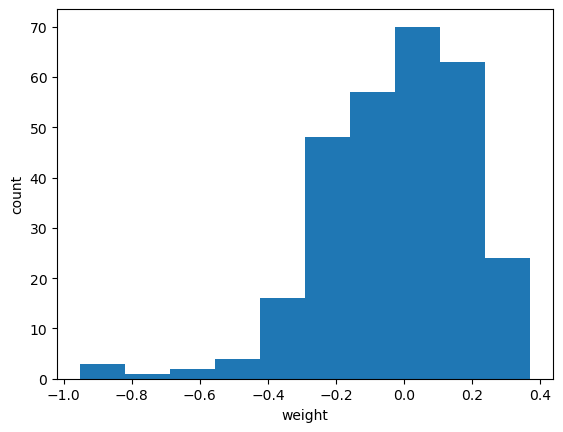

In [12]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

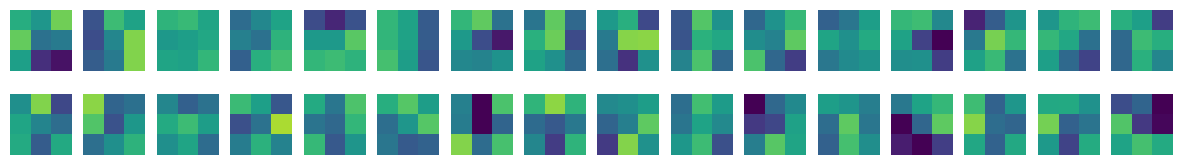

In [16]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

In [20]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 
                                          'relu', padding = 'same',input_shape = (28,28,1)))

In [22]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [26]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0010485508 0.08212009


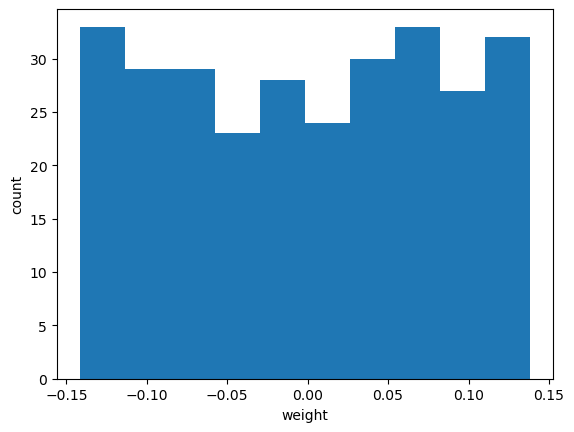

In [27]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

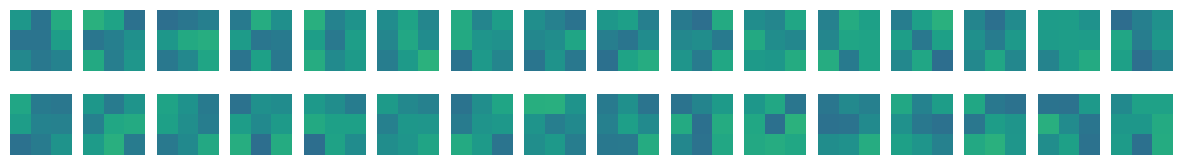

In [28]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

In [29]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [31]:
conv_acti = keras.Model(model.input, model.layers[0].output)

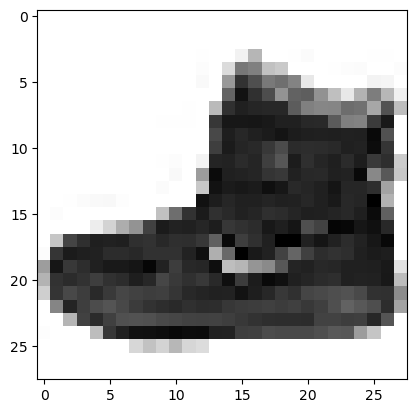

In [32]:
(train_input, train_target), (test_input, test_target)=\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [33]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 97ms/step


In [34]:
print(feature_maps.shape)

(1, 28, 28, 32)


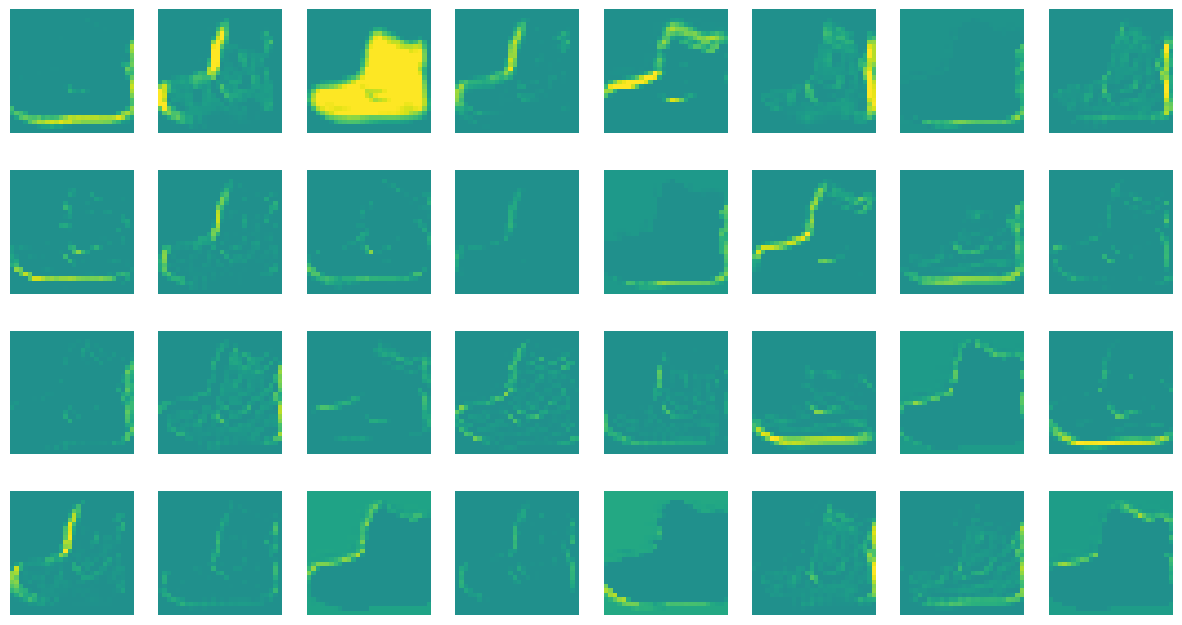

In [37]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()

In [38]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [39]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1)/255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 56ms/step


In [40]:
print(feature_maps.shape)

(1, 14, 14, 64)


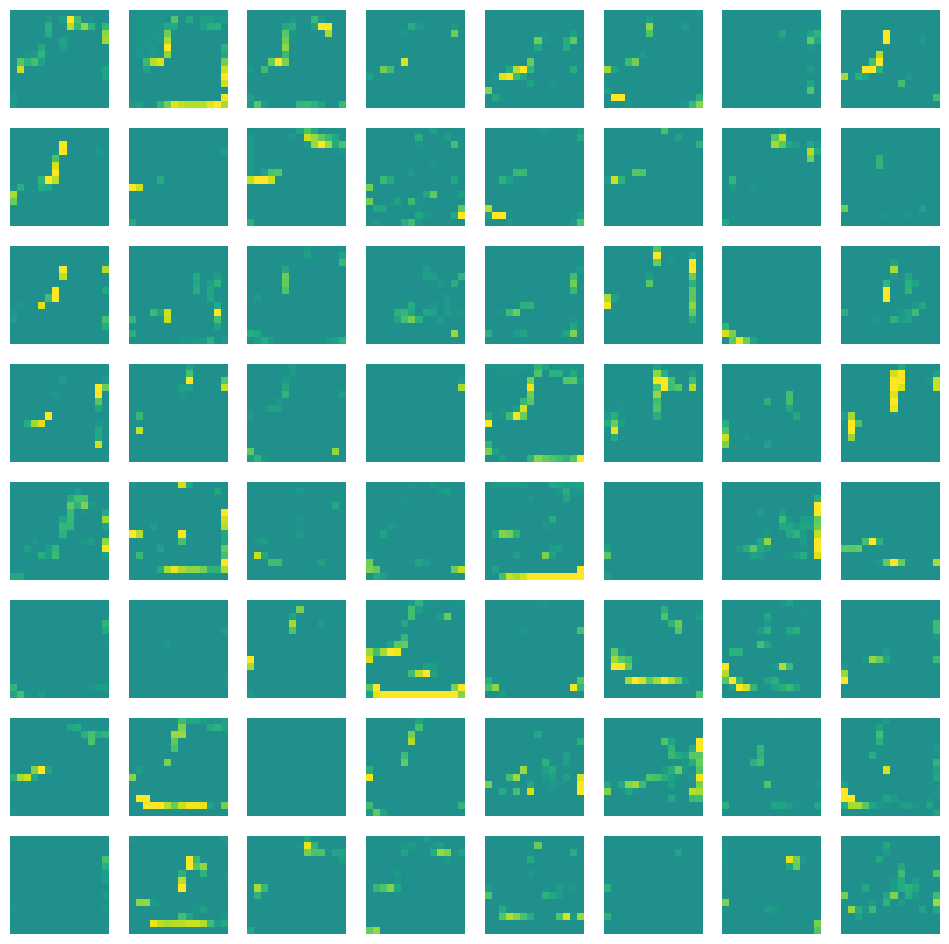

In [44]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8 + j], vmin = -0.5, vmax = 0.5)
        axs[i,j].axis('off')
plt.show()